In [5]:
!pip install pandas

In [45]:
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [3]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [4]:
df=pd.read_csv("forestfires (1).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
#fix the random seed for reproducibility
seed=7
numpy.random.seed(seed)

In [6]:
df['month'].unique(),df['month'].value_counts()

(array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
        'dec', 'may', 'nov'], dtype=object),
 aug    184
 sep    172
 mar     54
 jul     32
 feb     20
 jun     17
 oct     15
 apr      9
 dec      9
 jan      2
 may      2
 nov      1
 Name: month, dtype: int64)

In [7]:
df['day'].unique(),df['day'].value_counts()

(array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object),
 sun    95
 fri    85
 sat    84
 mon    74
 tue    64
 thu    61
 wed    54
 Name: day, dtype: int64)

In [8]:
df['size_category'].unique(),df['size_category'].value_counts()
label_encoder=preprocessing.LabelEncoder()
df['size_category']=label_encoder.fit_transform(df['size_category'])
df['month']=label_encoder.fit_transform(df['month'])
df['day']=label_encoder.fit_transform(df['day'])

In [9]:
#split the dataset into x and y
x=df.iloc[:,:11]
y=df['size_category']

In [10]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [24]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [25]:
#compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
768*0.67

514.5600000000001

In [27]:
# Fit the model
area = model.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 2s 90ms/step - loss: 57.5752 - accuracy: 0.2486 - val_loss: 53.2712 - val_accuracy: 0.3333
Epoch 2/250
7/7 [==============================] - 0s 11ms/step - loss: 47.5380 - accuracy: 0.2572 - val_loss: 44.4321 - val_accuracy: 0.3743
Epoch 3/250
7/7 [==============================] - 0s 12ms/step - loss: 38.4375 - accuracy: 0.2717 - val_loss: 36.1237 - val_accuracy: 0.3801
Epoch 4/250
7/7 [==============================] - 0s 11ms/step - loss: 29.4205 - accuracy: 0.2890 - val_loss: 28.2672 - val_accuracy: 0.3801
Epoch 5/250
7/7 [==============================] - 0s 10ms/step - loss: 20.9308 - accuracy: 0.3266 - val_loss: 20.1098 - val_accuracy: 0.3860
Epoch 6/250
7/7 [==============================] - 0s 11ms/step - loss: 11.4184 - accuracy: 0.3468 - val_loss: 9.6693 - val_accuracy: 0.4094
Epoch 7/250
7/7 [==============================] - 0s 13ms/step - loss: 3.0562 - accuracy: 0.5925 - val_loss: 4.1046 - val_accuracy: 0.5380
Epoch 8/2

7/7 [==============================] - 0s 11ms/step - loss: 0.3824 - accuracy: 0.8497 - val_loss: 0.6545 - val_accuracy: 0.7427
Epoch 60/250
7/7 [==============================] - 0s 12ms/step - loss: 0.3701 - accuracy: 0.8410 - val_loss: 0.7210 - val_accuracy: 0.6959
Epoch 61/250
7/7 [==============================] - 0s 11ms/step - loss: 0.3633 - accuracy: 0.8382 - val_loss: 0.6365 - val_accuracy: 0.7251
Epoch 62/250
7/7 [==============================] - 0s 10ms/step - loss: 0.3568 - accuracy: 0.8497 - val_loss: 0.6066 - val_accuracy: 0.7427
Epoch 63/250
7/7 [==============================] - 0s 10ms/step - loss: 0.3496 - accuracy: 0.8497 - val_loss: 0.6426 - val_accuracy: 0.7018
Epoch 64/250
7/7 [==============================] - 0s 12ms/step - loss: 0.3374 - accuracy: 0.8584 - val_loss: 0.5695 - val_accuracy: 0.7778
Epoch 65/250
7/7 [==============================] - 0s 11ms/step - loss: 0.3385 - accuracy: 0.8613 - val_loss: 0.5941 - val_accuracy: 0.7427
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 14ms/step - loss: 0.1756 - accuracy: 0.9364 - val_loss: 0.3829 - val_accuracy: 0.8363
Epoch 118/250
7/7 [==============================] - 0s 12ms/step - loss: 0.1722 - accuracy: 0.9364 - val_loss: 0.3574 - val_accuracy: 0.8187
Epoch 119/250
7/7 [==============================] - 0s 18ms/step - loss: 0.1798 - accuracy: 0.9364 - val_loss: 0.3531 - val_accuracy: 0.8246
Epoch 120/250
7/7 [==============================] - 0s 21ms/step - loss: 0.1800 - accuracy: 0.9335 - val_loss: 0.3770 - val_accuracy: 0.8363
Epoch 121/250
7/7 [==============================] - 0s 18ms/step - loss: 0.1740 - accuracy: 0.9364 - val_loss: 0.3398 - val_accuracy: 0.8363
Epoch 122/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1708 - accuracy: 0.9306 - val_loss: 0.3646 - val_accuracy: 0.8363
Epoch 123/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1676 - accuracy: 0.9364 - val_loss: 0.3385 - val_accuracy: 0.8363
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1146 - accuracy: 0.9653 - val_loss: 0.2454 - val_accuracy: 0.8889
Epoch 176/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1127 - accuracy: 0.9595 - val_loss: 0.2476 - val_accuracy: 0.8947
Epoch 177/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1113 - accuracy: 0.9566 - val_loss: 0.2407 - val_accuracy: 0.8889
Epoch 178/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1102 - accuracy: 0.9595 - val_loss: 0.2417 - val_accuracy: 0.8947
Epoch 179/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1108 - accuracy: 0.9624 - val_loss: 0.2462 - val_accuracy: 0.8947
Epoch 180/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1083 - accuracy: 0.9595 - val_loss: 0.2432 - val_accuracy: 0.8947
Epoch 181/250
7/7 [==============================] - 0s 10ms/step - loss: 0.1073 - accuracy: 0.9595 - val_loss: 0.2478 - val_accuracy: 0.8947
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0787 - accuracy: 0.9827 - val_loss: 0.1775 - val_accuracy: 0.9123
Epoch 234/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0776 - accuracy: 0.9711 - val_loss: 0.1858 - val_accuracy: 0.9298
Epoch 235/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0765 - accuracy: 0.9740 - val_loss: 0.1788 - val_accuracy: 0.9298
Epoch 236/250
7/7 [==============================] - 0s 9ms/step - loss: 0.0757 - accuracy: 0.9711 - val_loss: 0.1787 - val_accuracy: 0.9298
Epoch 237/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0773 - accuracy: 0.9711 - val_loss: 0.1824 - val_accuracy: 0.9298
Epoch 238/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0840 - accuracy: 0.9769 - val_loss: 0.1720 - val_accuracy: 0.9240
Epoch 239/250
7/7 [==============================] - 0s 10ms/step - loss: 0.0888 - accuracy: 0.9566 - val_loss: 0.1690 - val_accuracy: 0.9181
Epoch 2

In [28]:
#evaluate the model
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9574
accuracy: 95.74%


In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
scores

[0.09957623481750488, 0.957446813583374]

In [33]:
# Visualize training area

# list all data in area
area.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

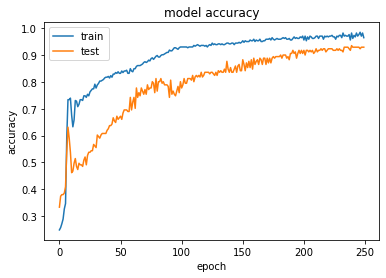

In [34]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(area.history['accuracy'])
plt.plot(area.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()